In [1]:
import sys

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

This notebook is using the pytorch library from 
https://github.com/yanneta/deeplearning/tree/master/nbs
to solve the bone age challenge from 
http://rsnachallenges.cloudapp.net/competitions/4

In [2]:
path = "/data/yinterian/bone_age/"

In [3]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np

%matplotlib inline

### Looking at the data

In [4]:
from os import listdir
from os.path import join
print(listdir(path))
#print(listdir(join(path, 'boneage-training-dataset')))

['val-color', 'train_target.zip', 'sample_submission.zip', 'boneage-validation-dataset-2', 'boneage-validation-dataset-1', 'models', 'submission-rand.csv', 'document.txt', 'boneage-validation-dataset-2.zip', 'tmp', 'train.csv', 'boneage-validation-dataset-1.zip', 'boneage-training-dataset.zip', 'training-color', 'gender-val.csv', 'sample_submission', 'boneage-training-dataset', 'train2.csv']


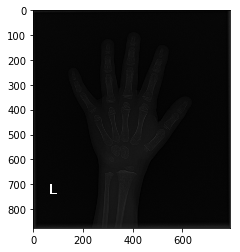

In [5]:
onebone = join(path, 'boneage-training-dataset/3370.png')
img = mpimg.imread(onebone)
plt.imshow(img, cmap='gray')

In [6]:
img.shape

(876, 793)

### Export images from B&W to color

In [ ]:
import cv2

In [ ]:
img = mpimg.imread(onebone)
color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#im = PIL.Image.open(onebone).convert('RGB')
color.shape

In [24]:
# Don't run this again
import scipy
color_path = "/data/yinterian/bone_age/training-color/"
bw_path = join(path, 'boneage-training-dataset')
def from_bw2color(bw_path, color_path):
    files = listdir(bw_path)
    for f in files:
        new_path = join(color_path, f)
        bw_f = join(bw_path, f)
        img = mpimg.imread(bw_f)
        color_im = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        scipy.misc.imsave(new_path, color_im) 

In [ ]:
#from_bw2color(bw_path, color_path)
bw_val1 = join(path, 'boneage-validation-dataset-1')
bw_val2 = join(path, 'boneage-validation-dataset-2')
color_val = join(path, 'val-color')
from_bw2color(bw_val1, color_val)

In [ ]:
import scipy
f = '5914.png'
new_path = join(color_path, f2)
bw_f = join(bw_path, f)
img = mpimg.imread(bw_f)
scipy.misc.imsave
color_im = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
#scipy.misc.imsave(new_path, color_im) 

In [ ]:
color_im.shape

In [ ]:
plt.imshow(color_im)

In [ ]:
onebone = join(path, 'training-color/5914.png')
img = mpimg.imread(onebone)
plt.imshow(img)

In [ ]:
img.shape

### Dataset definition

In [4]:
bs=64; sz=350
f_model = resnet34
path = "/data/yinterian/bone_age/"
img_folder = "training-color"
csv_fname = os.path.join(path, "train2.csv")

In [5]:
# these are the validation indices
seed = 3
np.random.seed(seed)
n = 12611
m = int(n*0.2)
val_idxs = np.random.choice(n, m, replace=False)
val_idxs

array([6067,  466, 5556, ..., 9525, 2740,  810])

In [6]:
# transforms_side_on
tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_basic,
                       max_zoom=1.05)
data = ImageClassifierData.from_csv(path, img_folder, csv_fname, bs, tfms, val_idxs, suffix=".png",
                            test_name="val-color", continuous=True)
learn = ConvLearner.pretrained(f_model, data, ps=[0.2, 0.4], precompute=True)

100%|██████████| 23/23 [00:26<00:00,  1.17s/it]


In [7]:
lrf=learn.lr_find()

 88%|████████▊ | 139/158 [00:00<00:01, 10.77it/s, loss=115]


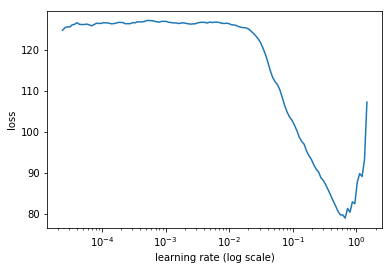

In [8]:
learn.sched.plot()

In [9]:
learn.fit(1e-1, 4)

[  0.      22.4967  18.9444]                                
[  1.      20.708   18.7965]                                
[  2.      19.4658  15.1048]                                
[  3.      19.2165  16.6075]                                



In [10]:
lrs=np.array([1e-4,1e-3,1e-2])
learn.precompute=False

In [11]:
learn.fit(1e-1, 3, cycle_len=1, cycle_mult=2)

[  0.      17.3259  14.9275]                                
[  1.      19.8899  15.7767]                                
[  2.      17.1385  14.3747]                                
[  3.      19.1252  15.2959]                                
[  4.      18.8941  18.3366]                                
[  5.      16.8868  14.3523]                                
[  6.      16.3394  14.3293]                                



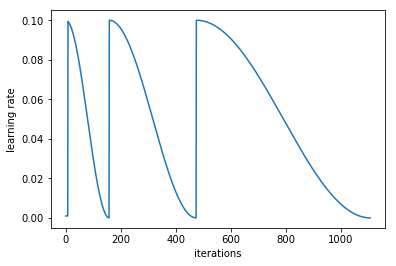

In [68]:
learn.sched.plot_lr()

In [69]:
exp = "exp1"
model_name = '{}_{}_fc_s{}'.format(exp, sz, seed)
learn.save(model_name)

In [72]:
exp = "exp1"
model_name = '{}_{}_fc_s{}'.format(exp, sz, seed)
learn.load(model_name)

In [73]:
lrs=np.array([1e-4,1e-3,1e-2])
learn.freeze_to(6)
learn.lr_find(lrs/1e3)






  0%|          | 0/158 [00:00<?, ?it/s]





 89%|████████▉ | 141/158 [03:12<00:25,  1.49s/it, loss=46.7]
                                                            

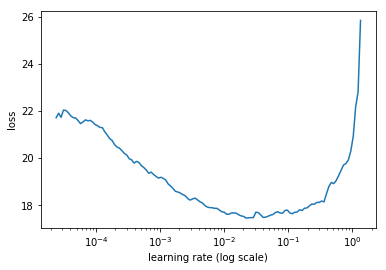

In [74]:
learn.sched.plot()

In [75]:
learn.fit(lrs, 2, cycle_len=1)


                                       
                                       
                                       
                                       
  0%|          | 0/158 [00:00<?, ?it/s]
                                       
                                       
                                       
                                       
[  0.      13.8483  12.0142]                                
[  1.      12.8875  10.3568]                                



In [76]:
exp = "exp1"
model_name_6 = '{}_{}_fc_s{}_6'.format(exp, sz, seed)
learn.save(model_name_6)

 88%|████████▊ | 139/158 [03:10<00:21,  1.14s/it, loss=40.7]

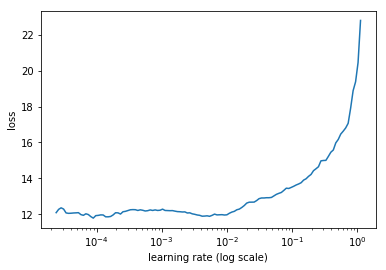

In [77]:
lrs=np.array([1e-4,1e-3,1e-2])
learn.freeze_to(5)
learn.lr_find(lrs/1e3)
learn.sched.plot()

In [78]:
lrs=np.array([1e-5,1e-4,1e-3])
learn.fit(lrs, 2, cycle_len=1)

                                                            
                                                            
                                                            

                                                            
                                                            
                                                            
                                                            

                                                            
[  0.      11.6236  10.4544]                                
[  1.      11.9374  10.059 ]                                



In [79]:
exp = "exp1"
model_name_5 = '{}_{}_fc_s{}_5'.format(exp, sz, seed)
learn.save(model_name_5)

In [11]:
exp = "exp1"
model_name_5 = '{}_{}_fc_s{}_5'.format(exp, sz, seed)
learn.load(model_name_5)

 91%|█████████ | 143/158 [03:15<00:20,  1.36s/it, loss=37]  

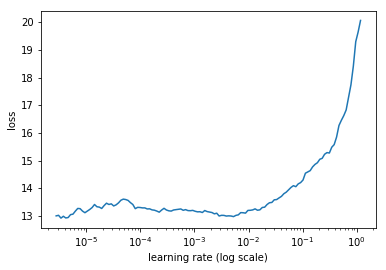

In [12]:
lrs=np.array([1e-5,1e-4,1e-3])
learn.freeze_to(4)
learn.lr_find(lrs/1e3)
learn.sched.plot()

In [13]:
learn.fit(lrs, 2, cycle_len=1)

                                                          
                                                          


                                                          
                                                          
                                                          

                                                          
                                                          
[  0.      11.9795  10.699 ]                                
[  1.      12.0778  10.1953]                                



In [14]:
model_name_4 = '{}_fc{}_4'.format(sz, seed)
learn.save(model_name_4)

                                                            
                                                            

                                                            

                                                            
                                                            

                                                            

                                                            A
 91%|█████████ | 143/158 [03:16<00:19,  1.31s/it, loss=45.2]

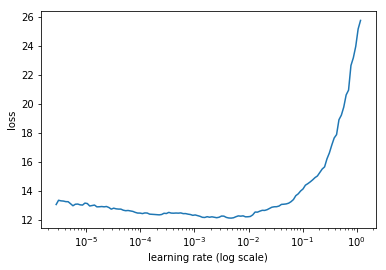

In [16]:
learn.unfreeze()
learn.lr_find(lrs/1e3)
learn.sched.plot()

In [17]:
lr=np.array([1e-4,3e-4,1e-3])

In [18]:
learn.fit(lr, 1)

                                                            
                                                            
                                                            

                                                            
                                                            
                                                            
                                                            
                                                            

[  0.      11.5076  12.7263]                                



In [19]:
learn.fit(lr/3, 3, cycle_len=1, cycle_mult=2)

[  0.      10.9848   9.5126]                                
[  1.      11.1897  10.3642]                                
[  2.      11.3022   9.3238]                                
[  3.      10.9069   9.764 ]                                
[  4.      10.5235   9.1758]                                
[  5.      10.6499   9.1157]                                
[  6.      10.5848   9.0447]                                



In [20]:
model_name_all = '{}_fc{}_all'.format(sz, seed)
learn.save(model_name_all)

In [ ]:
(*learn.TTA())

In [ ]:
learn.TTA()

##  Predicting 

In [23]:
test_preds = learn.predict(is_test=True)
test_preds.shape

(1425, 1)

In [62]:
test_preds_v2 = learn.TTA(is_test=True)

In [76]:
preds = test_preds_v2[0]

In [31]:
test_files = data.test_dl.dataset.fnames
#test_files

In [27]:
test_preds[1][0]

134.1875

In [34]:
path

'/data/yinterian/bone_age/'

In [42]:
names = [f.replace("val-color/", "").replace(".png", "") for f in test_files]

In [52]:
t = [(int(names[i]), test_preds[i][0]) for i in range(len(names))]

In [77]:
t = [(int(names[i]), preds[i][0]) for i in range(len(names))]

In [78]:
t_sortes = sorted(t, key=lambda tup: tup[0])

In [79]:
columnTitleRow = "id,boneage\n"

with open(f"{path}results.csv", "w") as csv:
    csv.write(columnTitleRow)
    for i in range(len(test_files)):
        t = t_sortes[i]
        row = f'{t[0]},{t[1]}\n'
        csv.write(row)